In [3]:
#Download dataset from Kaggle
#pip install kaggle
#kaggle datasets download kazanova/sentiment140 -p data/raw --unzip

# Exploratory Data Analysis (EDA)

In [56]:
# Data manipulation and analysis
import pandas as pd

# To visualize 
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [38]:
file_path = "C:/Users/kunve/OneDrive/Desktop/Projects/twitter_sentiment_analysis_LR_NB/data/raw/sentiment_raw_data.csv"
columns = ["target", "id", "date", "flag", "user", "text"]
data_df = pd.read_csv(file_path, encoding="latin-1", names=columns)

In [39]:
data_df.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [40]:
data_df["target"].value_counts()

target
0    800000
4    800000
Name: count, dtype: int64

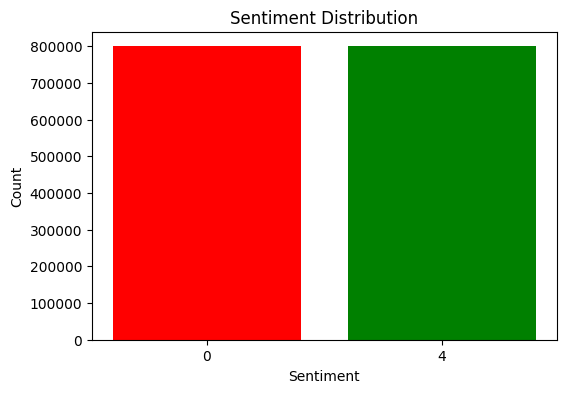

In [49]:
sentiment_counts = df['target'].value_counts().sort_index()

# Plot
plt.figure(figsize=(6,4))
plt.bar(sentiment_counts.index.astype(str), sentiment_counts.values, color=['red', 'green'])
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Distribution")
plt.show()


In [50]:
# Length in characters
df["tweet_length"] = df["text"].astype(str).apply(len)

# OR length in words
df["tweet_length_words"] = df["text"].astype(str).apply(lambda x: len(x.split()))


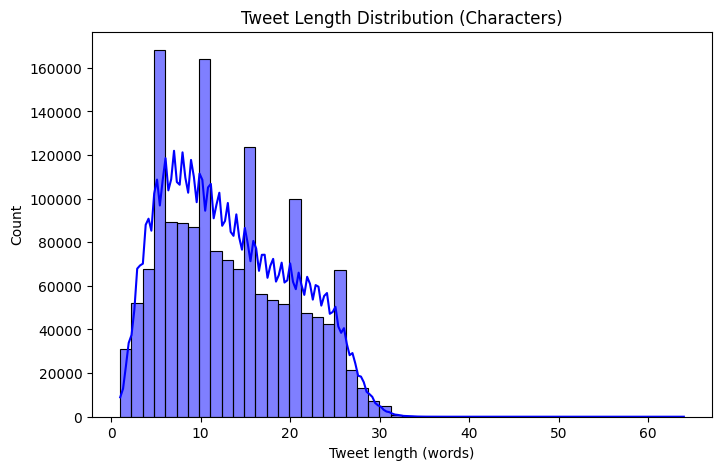

In [52]:
plt.figure(figsize=(8,5))
sns.histplot(df["tweet_length_words"], bins=50, kde=True, color="blue")
plt.title("Tweet Length Distribution (Characters)")
plt.xlabel("Tweet length (words)")
plt.ylabel("Count")
plt.show()

In [55]:
# Negative examples
print("Negative tweets:")
print(df[df['target'] == 0]['text'].head(5).to_list())

# Positive examples
print("\nPositive tweets:")
print(df[df['target'] == 4]['text'].head(5).to_list())


Negative tweets:
["@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D", "is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!", '@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds', 'my whole body feels itchy and like its on fire ', "@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. "]

Positive tweets:
['I LOVE @Health4UandPets u guys r the best!! ', 'im meeting up with one of my besties tonight! Cant wait!!  - GIRL TALK!!', '@DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart. ', 'Being sick can be really cheap when it hurts too much to eat real food  Plus, your friends make you soup', '@LovesBrooklyn2 he has that effect on everyone ']


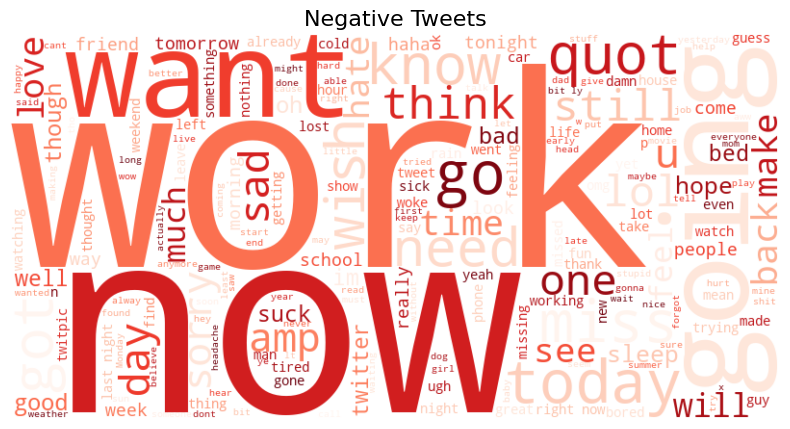

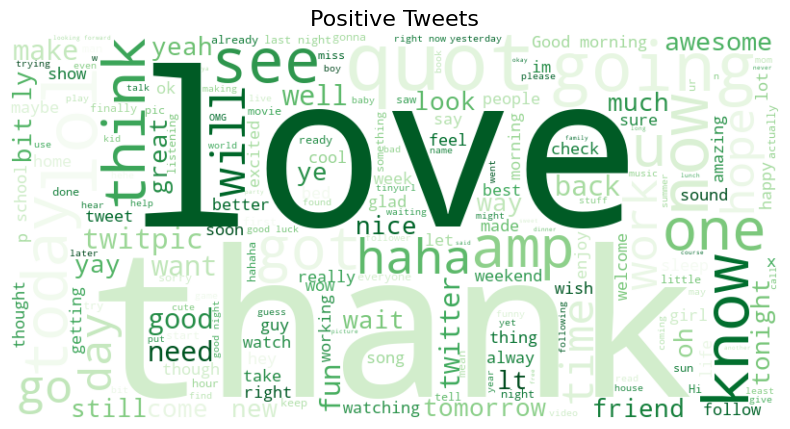

In [57]:
def plot_wordcloud(text, title, color="black"):
    wordcloud = WordCloud(width=800, height=400, background_color="white", colormap=color).generate(" ".join(text))
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=16)
    plt.show()

# Negative tweets
neg_text = df[df['target'] == 0]['text']
plot_wordcloud(neg_text, "Negative Tweets", color="Reds")

# Positive tweets
pos_text = df[df['target'] == 4]['text']
plot_wordcloud(pos_text, "Positive Tweets", color="Greens")